In [ ]:
import copy, numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
np.random.seed(0) 

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)


# training dataset generation
int2binary = {}
binary_dim = 8

largest_number = pow(2,binary_dim)
binary = np.unpackbits(
    np.array([range(largest_number)],dtype=np.uint8).T,axis=1)
for i in range(largest_number):
    int2binary[i] = binary[i]


# input variables
alpha = 0.1
#set dx
input_dim = 2
#set da
hidden_dim = 16 
#set dy
output_dim = 1

errors = []

# initialize neural network weights
Wa = 2*np.random.random((input_dim,hidden_dim)) - 1
ba = np.zeros((1, hidden_dim))
Wy = 2*np.random.random((hidden_dim,output_dim)) - 1
by = np.zeros((1, output_dim))
Wh = 2*np.random.random((hidden_dim,hidden_dim)) - 1

Wa_update = np.zeros_like(Wa)
ba_update = np.zeros_like(ba)
Wy_update = np.zeros_like(Wy)
by_update = np.zeros_like(by)
Wh_update = np.zeros_like(Wh)

# training 
for j in range(100000):
    
    # generate a simple addition problem (a + b = c)
    a_int = np.random.randint(largest_number/2) # int version
    a = int2binary[a_int] # binary encoding

    b_int = np.random.randint(largest_number/2) # int version
    b = int2binary[b_int] # binary encoding

    # true answer
    c_int = a_int + b_int
    
    overallError = 0
    
    
    #list for a values
    a_values = list()
    #a<0> initializaed as 0 vector
    a_values.append(np.zeros(hidden_dim))
    
    # moving along the positions in the binary encoding
    for position in range(binary_dim):
        
        # generate input and output
        #input binary is processed in reverse order
        X = np.array([[a[binary_dim - position - 1],b[binary_dim - position - 1]]])
        y = c_int 

        # hidden layer (input ~+ prev_hidden)
        a_t = sigmoid(np.dot(X,Wa) + ba + np.dot(a_values[-1],Wh))

        # output layer 
        # only the last timestep has output,
        # and only last timestep can update Wy, by
        if position == binary_dim-1:
            pred_yt = np.dot(a_t,Wy) + by

            #loss function: 0.5*(y_pred - y)**2
            #no more sigmoid
            pred_yt_error = pred_yt[0][0] - y
        
            kT_delta = np.array([[pred_yt_error]])
            overallError = (0.5*pred_yt_error**2)
    
            # store decoded predicted digit 
            final_pred = np.round(pred_yt[0][0])
        
        # store hidden layer so we can use it in the next timestep
        a_values.append(copy.deepcopy(a_t))
    
    #h<T+1>_delta initialized as 0 vector
    future_ht_delta = np.zeros(hidden_dim)
    
    for position in range(binary_dim):
        #backpropagate from last timestep 
        X = np.array([[a[position],b[position]]])
        at = a_values[-position-1]
        #get a<t-1> for later use
        prev_at = a_values[-position-2]
        
        # error at hidden layer
        ht_delta = (future_ht_delta.dot(Wh.T)) * sigmoid_output_to_derivative(at)

        # let's update all our weights so we can try again
        if position == 0:
            Wy_update = np.atleast_2d(at).T.dot(kT_delta)
            by_update = kT_delta
        Wh_update += np.atleast_2d(prev_at).T.dot(ht_delta)
        Wa_update += X.T.dot(ht_delta)
        ba_update += ht_delta
        
        future_ht_delta = ht_delta
    
    #gradient descent
    Wy -= Wy_update * alpha
    by -= by_update * alpha
    Wh -= Wh_update * alpha 
    Wa -= Wa_update * alpha
    ba -= ba_update * alpha 

    #reset to 0 for next example
    Wy_update *= 0
    by_update *= 0
    Wh_update *= 0
    Wa_update *= 0
    ba_update *= 0
    
    # print out progress
    if(j % 1000 == 0):
        print ("Error:" + str(overallError))
        errors.append(overallError)
        # print ("Pred:" + str(final_pred))
        # print ("True:" + str(c_int))
        # print (str(a_int) + " + " + str(b_int) + " = " + str(final_pred))
        # print ("------------")


     

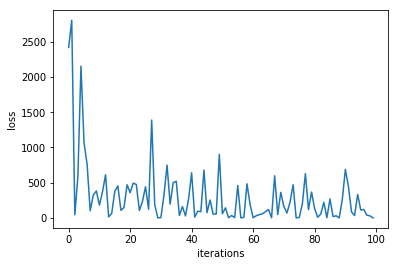

In [5]:
plt.plot(errors)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()